In [12]:
!pip install xgboost

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

In [14]:
data = pd.read_csv("diabetes_risk_prediction_dataset.csv")

In [15]:
label_encoder = LabelEncoder()
 
# List of columns to be encoded
columns_to_encode = ['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia',
                     'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 
                     'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity', 'class']
 
# Apply LabelEncoder to each column
for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])

In [16]:
X = data.drop('class', axis=1)
y = data['class']

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=2,
              num_parallel_tree=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [19]:
y_pred = model.predict(X_val)

In [20]:
# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)

In [21]:
# Print the accuracy
print(f"Accuracy of the model: {accuracy * 100:.2f}%")

Accuracy of the model: 97.12%


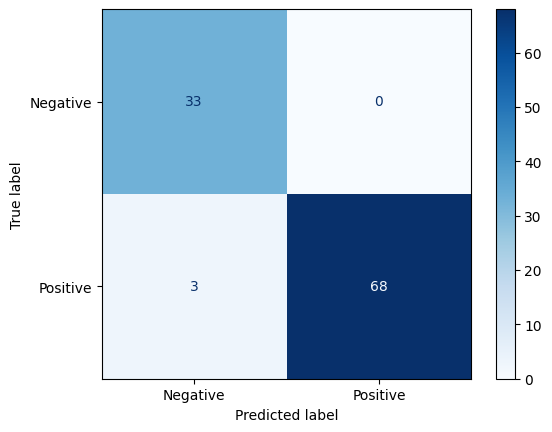

In [22]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
 
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [23]:
# Generate classification report
class_report = classification_report(y_val, y_pred, target_names=label_encoder.classes_)
print("Classification Report:\n", class_report)
 
# Calculate additional metrics
precision_macro = precision_score(y_val, y_pred, average='macro')
recall_macro = recall_score(y_val, y_pred, average='macro')
f1_macro = f1_score(y_val, y_pred, average='macro')
 
precision_micro = precision_score(y_val, y_pred, average='micro')
recall_micro = recall_score(y_val, y_pred, average='micro')
f1_micro = f1_score(y_val, y_pred, average='micro')
 
print(f"Macro Precision: {precision_macro:.2f}")
print(f"Macro Recall: {recall_macro:.2f}")
print(f"Macro F1-score: {f1_macro:.2f}")
print(f"Micro Precision: {precision_micro:.2f}")
print(f"Micro Recall: {recall_micro:.2f}")
print(f"Micro F1-score: {f1_micro:.2f}")

Classification Report:
               precision    recall  f1-score   support

    Negative       0.92      1.00      0.96        33
    Positive       1.00      0.96      0.98        71

    accuracy                           0.97       104
   macro avg       0.96      0.98      0.97       104
weighted avg       0.97      0.97      0.97       104

Macro Precision: 0.96
Macro Recall: 0.98
Macro F1-score: 0.97
Micro Precision: 0.97
Micro Recall: 0.97
Micro F1-score: 0.97
